In [3]:
!pip install pandas matplotlib --quiet

You should consider upgrading via the '/home/alex/Study/pathplanning/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
data = []
for r, d, f in os.walk("./"):
    if r.count("/") == 3:
        data.extend([pd.read_csv(f"{r}/{file}") for file in filter(lambda s: s.endswith(".csv"), f)])

In [4]:
df = pd.concat(data, ignore_index=True)
df = df.drop("Unnamed: 0", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_x             18000 non-null  float64
 1   start_y             18000 non-null  float64
 2   end_x               18000 non-null  float64
 3   end_y               18000 non-null  float64
 4   euclidian_distance  18000 non-null  float64
 5   max_edge_len        18000 non-null  float64
 6   goal_rate           18000 non-null  float64
 7   finished            18000 non-null  bool   
 8   iter_count          15001 non-null  float64
 9   final_distance      15001 non-null  float64
dtypes: bool(1), float64(9)
memory usage: 1.3 MB


In [5]:
df["dist_bin"] = pd.cut(df.euclidian_distance, int(df.euclidian_distance.max() // 10), labels=False, retbins=False, right=True)

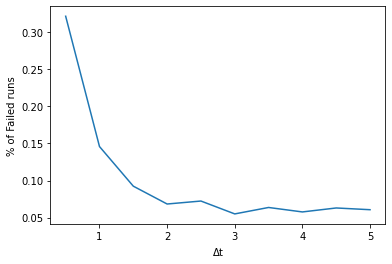

In [39]:
df[df.finished == False].max_edge_len.value_counts(normalize=True).sort_index().plot();
plt.gca().set_xlabel("$\Delta$t");
plt.gca().set_ylabel("% of Failed runs");
plt.plot();

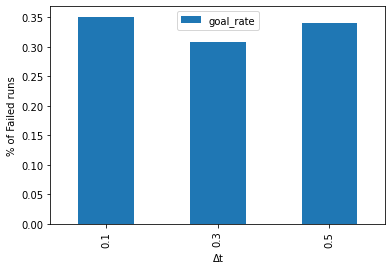

In [40]:
df[df.finished == False].goal_rate.value_counts(normalize=True).sort_index().to_frame().reset_index().plot.bar(x="index", y="goal_rate")
plt.gca().set_xlabel("$\Delta$t");
plt.gca().set_ylabel("% of Failed runs");

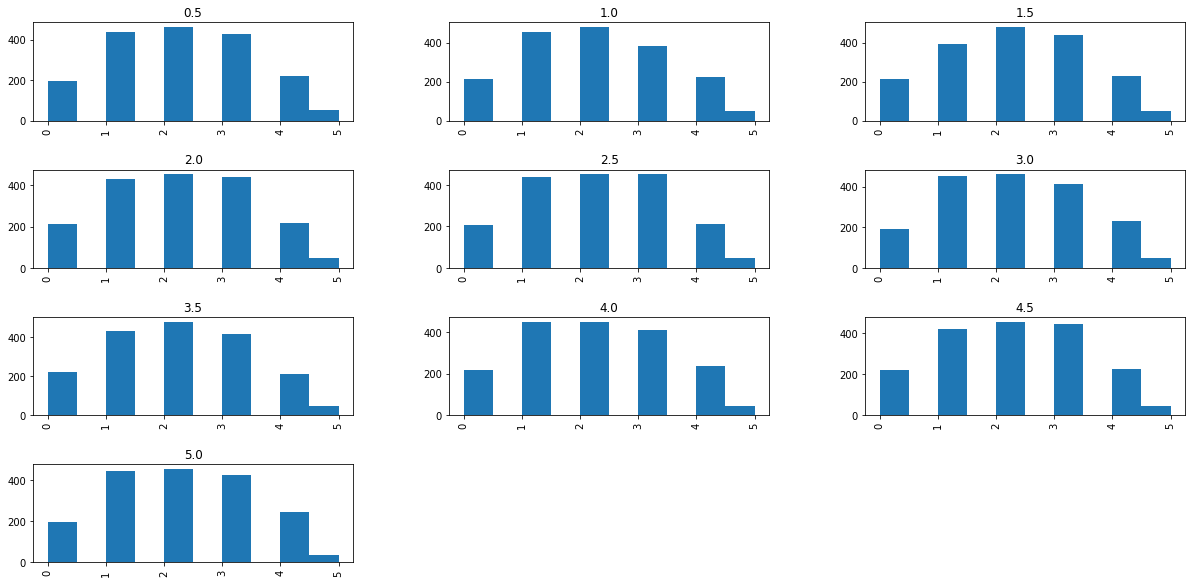

In [8]:
df.dist_bin.hist(by=df.max_edge_len, figsize=(20, 10));

In [ ]:
(df.final_distance - df.euclidian_distance).dropna().hist(by=df.max_edge_len, figsize=(20, 10));

In [ ]:
df["distance_diff"] = df["final_distance"] - df["euclidian_distance"]

In [ ]:
df[["final_distance", "max_edge_len"]].boxplot(by="max_edge_len", figsize=(20, 10));

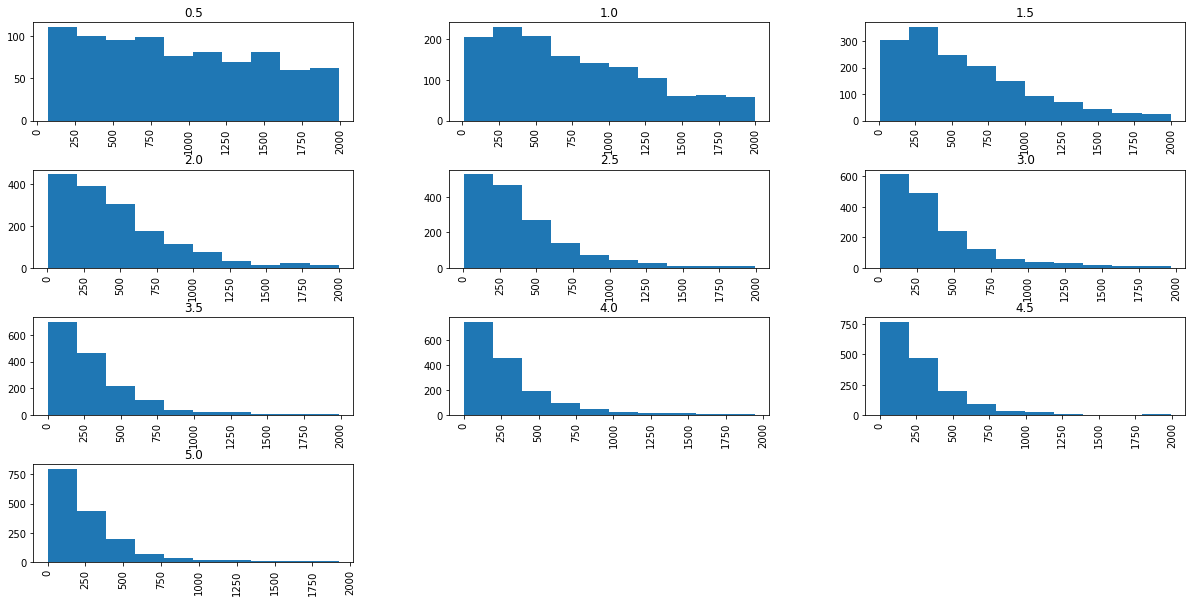

In [41]:
(df.iter_count).dropna().hist(by=df.max_edge_len, figsize=(20, 10));

Text(0, 0.5, '$Iterations$')

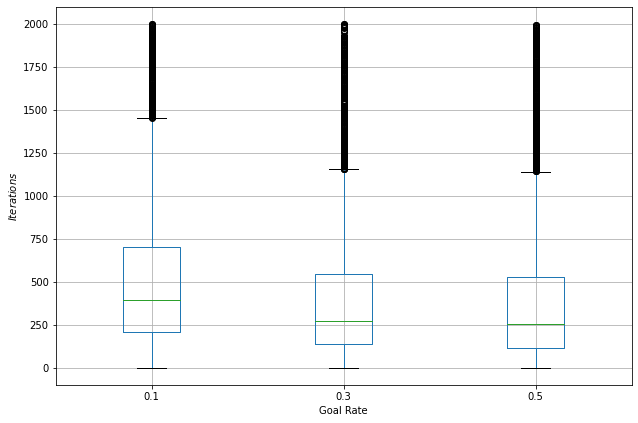

In [65]:
a = df.dropna()[["iter_count", "goal_rate"]].boxplot(column=["iter_count"], by="goal_rate", figsize=(10, 7))
a.get_figure().gca().set_title("");
a.get_figure().suptitle('');
a.get_figure().gca().set_xlabel("Goal Rate")
a.get_figure().gca().set_ylabel("$Iterations$")


Text(0, 0.5, 'Iterations')

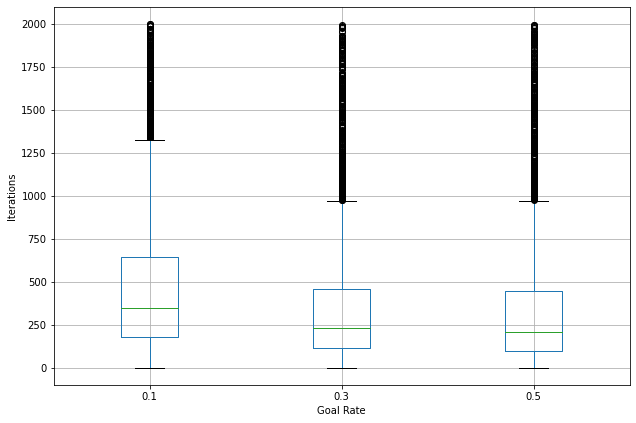

In [79]:
a = df[df.euclidian_distance < 40].dropna()[["iter_count", "goal_rate"]].boxplot(column=["iter_count"], by="goal_rate", figsize=(10, 7))
a.get_figure().gca().set_title("");
a.get_figure().suptitle('');
a.get_figure().gca().set_xlabel("Goal Rate")
a.get_figure().gca().set_ylabel("Iterations")


Text(0, 0.5, 'Iterations')

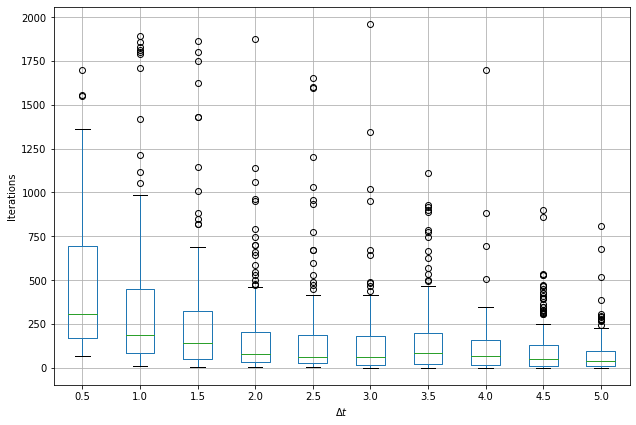

In [82]:
a = df[df.euclidian_distance < 10].dropna()[["iter_count", "max_edge_len"]].boxplot(column=["iter_count"], by="max_edge_len", figsize=(10, 7))
a.get_figure().gca().set_title("");
a.get_figure().suptitle('');
a.get_figure().gca().set_xlabel("$\Delta{t}$")
a.get_figure().gca().set_ylabel("Iterations")


Text(0, 0.5, 'Iterations')

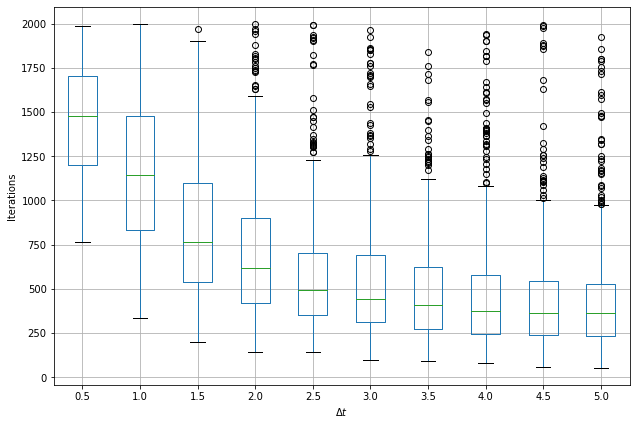

In [83]:
a = df[df.euclidian_distance > 35].dropna()[["iter_count", "max_edge_len"]].boxplot(column=["iter_count"], by="max_edge_len", figsize=(10, 7))
a.get_figure().gca().set_title("");
a.get_figure().suptitle('');
a.get_figure().gca().set_xlabel("$\Delta{t}$")
a.get_figure().gca().set_ylabel("Iterations")


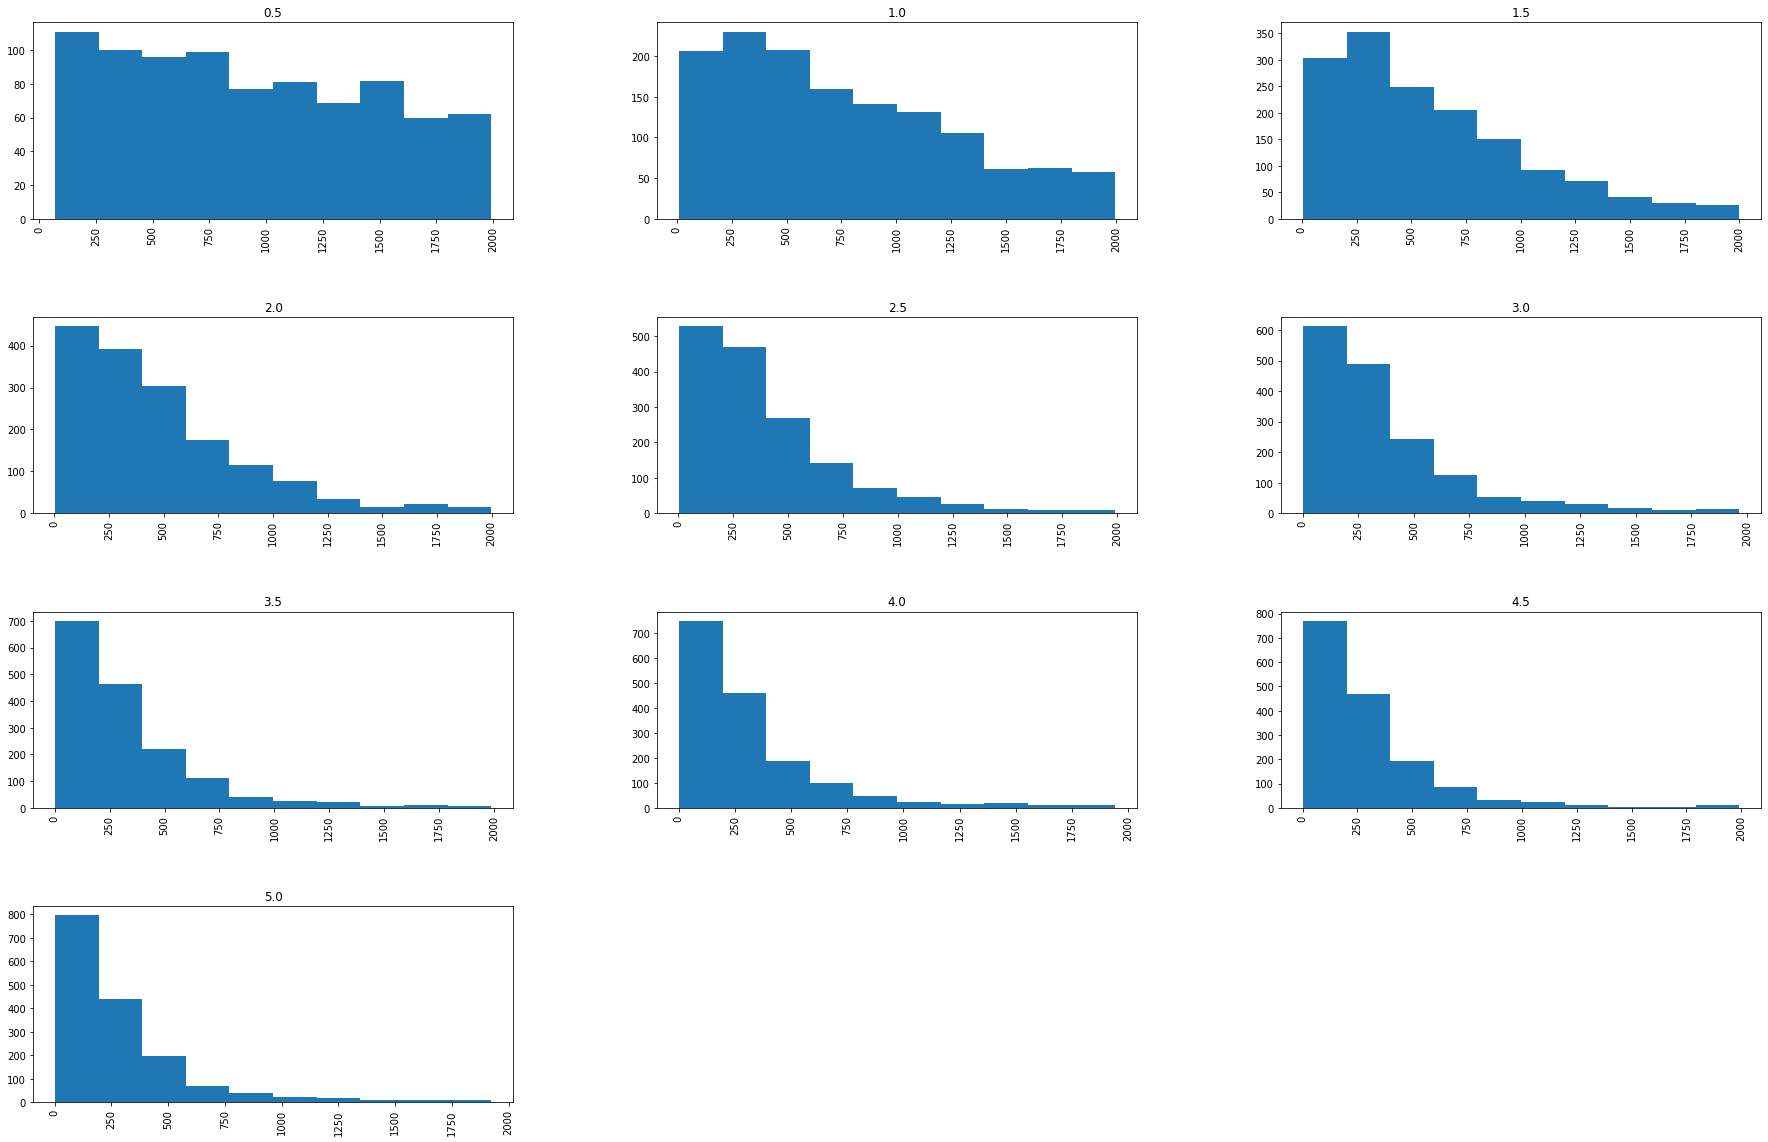

In [84]:
(df.iter_count).dropna().hist(by=[df.max_edge_len], figsize=(30, 20));